In [1]:
import numpy as np

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact, IntSlider

# Data prepration

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.int8)

In [4]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

<AxesSubplot:>

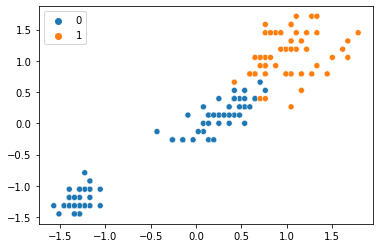

In [5]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [6]:
svm_clf = LinearSVC(C=1, loss='hinge')

In [7]:
svm_clf.fit(X, y)

LinearSVC(C=1, loss='hinge')

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1], dtype=int8)

# Plotting decision boundries

In [24]:
@interact(c=IntSlider(value=1, min=1, max=100, step=1))
def _(c):
    svm_clf = LinearSVC(C=c, loss='hinge')
    svm_clf.fit(X, y)
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    boundary_x = np.linspace(-1, 2)
    boundary_y = -(w[0]/w[1]) * boundary_x - (b/w[1])
    
    margin = 1 / np.sqrt(np.sum(w ** 2))
    w_hat = w / (np.sqrt(np.sum(w ** 2)))
    
    margin_line_a = np.column_stack((boundary_x, boundary_y)) + w_hat*margin
    margin_line_b = np.column_stack((boundary_x, boundary_y)) - w_hat*margin
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
    plt.plot(boundary_x, boundary_y, 'r')
    plt.plot(margin_line_a[:, 0], margin_line_a[:, 1], '--')
    plt.plot(margin_line_b[:, 0], margin_line_b[:, 1], 'b--')
    
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])

interactive(children=(IntSlider(value=1, description='c', min=1), Output()), _dom_classes=('widget-interact',)…